# Reading the data 

---

Lately, the _.fits_ data was transformed into _.csv_ and saved in database/csv_files. We are going to import a light curve sample and work with it.

In [1]:
# FILE_PATH = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv'
FILE_PATH = 'C:/Users/guisa/Google Drive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_CHR_0105833549_20080415T231048_20080907T224903.csv'

In [2]:
import pandas as pd

data_sample = pd.read_csv(FILE_PATH)
display(data_sample)

,DATE,WHITEFLUX
0,2008-04-16 11:17:01.652367,426155.25
1,2008-04-16 11:25:33.698232,426286.66
2,2008-04-16 11:34:05.744056,426893.88
3,2008-04-16 11:42:37.789881,426608.53
4,2008-04-16 11:51:09.835706,426326.50
...,...,...
24398,2008-09-08 10:14:38.220328,423704.44
24399,2008-09-08 10:23:10.182025,423994.22
24400,2008-09-08 10:31:42.143682,423316.50
24401,2008-09-08 10:40:14.105339,423452.84


In [44]:
import numpy as np

x = data_sample.DATE.to_numpy()
y = data_sample.WHITEFLUX.to_numpy()

In [4]:
!pip install control
from tools import *

You should consider upgrading via the 'c:\users\guisa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Loading BokehJS ...

# Phase folding

---



In [5]:
viz.view_lightcurve(x, y)

We can use BoxLeastSquares class to estimate the period, using the BLS algorithm


In [42]:
rand = np.random.RandomState(42)
t = rand.uniform(0, 10, 500)         # numpy array
y_test = np.ones_like(t)             # numpy array
y_test[np.abs((t + 1.0)%2.0-1)<0.08] = 1.0 - 0.1
y_test += 0.01 * rand.randn(len(t))

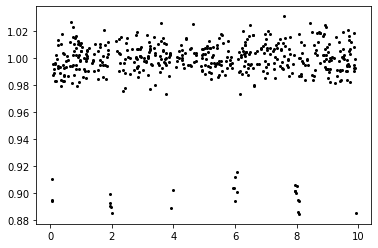

In [43]:
import matplotlib.pyplot as plt

plt.plot(t, y_test, 'k.', markersize=4)
plt.show()

In [46]:
model = BoxLeastSquares(t, y_test)
results = model.autopower(0.16)
results.period[np.argmax(results.power)] 

1.9923406038842544

In [47]:
periods = np.linspace(1.9, 2.1, 5)
results = model.power(periods, 0.16)
results.power  

array([0.01421067, 0.02842475, 0.10867671, 0.05117755, 0.01783253])

In [53]:
from astropy import units as u
from astropy.timeseries import BoxLeastSquares

model = BoxLeastSquares(x, y)
results = model.autopower()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

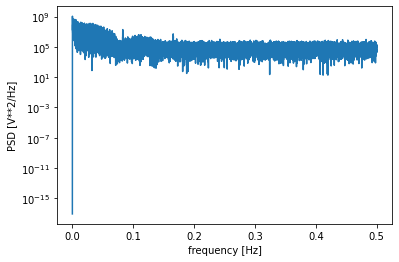

In [57]:
#####################
## Scipy

from scipy import signal

f, Pxx_den = signal.periodogram(y)
plt.semilogy(f, Pxx_den)
# plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()